In [3]:
# Load dataset
import pandas as pd

df = pd.read_csv('bse_data.csv')

print(df.head(5))

   number_siblings                   name  gender  age living_allowance  \
0                1     Nakasujja Gertrude  female   33              NaN   
1                3  Arinda Asiimwe Atweta  female   23           50,000   
2                4    Ndjekornom Victoire    male   23           25,000   
3                0         KATURAMU EDGAR    male   27          500,000   
4                4      Abinsinguza Lasse    male   24          100,000   

   have_bf_gf                profession  daily_meals  
0           1            Data Scientist            2  
1           1  Machine Learning Enginer            1  
2           0            Data Scientist            1  
3           0  Machine Learning Enginer            2  
4           1            Data Scientist            2  


In [4]:
# data cleaning and pre-processsing
# Check for missing values

print(df.isnull().sum())

number_siblings     0
name                0
gender              0
age                 0
living_allowance    7
have_bf_gf          0
profession          0
daily_meals         0
dtype: int64


In [5]:
# check for duplicates

print(df.duplicated().sum())

0


In [6]:
# count the number of siblings

print(df['number_siblings'].value_counts())

number_siblings
4    8
1    5
2    5
3    4
5    4
8    3
6    2
0    2
9    2
7    1
Name: count, dtype: int64


In [7]:
# count the number of people with a gf/bf

print(df["have_bf_gf"].value_counts())

have_bf_gf
0    24
1    12
Name: count, dtype: int64


In [9]:
# check for unique values

print(df['have_bf_gf'].unique())

[1 0]


In [10]:
# Remove commas and convert to numeric
df['living_allowance'] = df['living_allowance'].str.replace(',', '')
df['living_allowance'] = pd.to_numeric(df['living_allowance'], errors='coerce')

# Calculate the median of the living_allowance column
median_value = df['living_allowance'].median()

# Fill NaN values with the median
df['living_allowance'].fillna(median_value, inplace=True)

# Print the first 8 rows of the dataframe
print(df.head(8))

   number_siblings                      name  gender  age  living_allowance  \
0                1        Nakasujja Gertrude  female   33          200000.0   
1                3     Arinda Asiimwe Atweta  female   23           50000.0   
2                4       Ndjekornom Victoire    male   23           25000.0   
3                0            KATURAMU EDGAR    male   27          500000.0   
4                4         Abinsinguza Lasse    male   24          100000.0   
5                4       Beingana Jim Junior    male   20           10000.0   
6                6  Cyiza Ndoli Jean de Dieu    male   23           60000.0   
7                8       MUSIIMENTA CISSYLYN  female   20          260000.0   

   have_bf_gf                profession  daily_meals  
0           1            Data Scientist            2  
1           1  Machine Learning Enginer            1  
2           0            Data Scientist            1  
3           0  Machine Learning Enginer            2  
4           1

/tmp/ipykernel_80105/4058188964.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['living_allowance'].fillna(median_value, inplace=True)


In [11]:
# Summay statistics

print(df.describe())

       number_siblings        age  living_allowance  have_bf_gf  daily_meals
count        36.000000  36.000000      3.600000e+01   36.000000    36.000000
mean          3.888889  24.055556      3.428333e+05    0.333333     2.277778
std           2.504599   2.936903      4.499779e+05    0.478091     0.701472
min           0.000000  20.000000      2.000000e+03    0.000000     1.000000
25%           2.000000  22.750000      1.425000e+05    0.000000     2.000000
50%           4.000000  23.000000      2.000000e+05    0.000000     2.000000
75%           5.000000  24.000000      3.500000e+05    1.000000     3.000000
max           9.000000  33.000000      2.500000e+06    1.000000     3.000000


In [12]:
#number of gender

print(df['gender'].value_counts())

gender
male      24
female    12
Name: count, dtype: int64


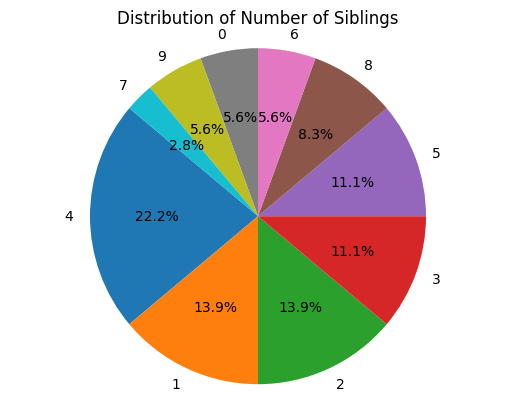

In [21]:
import matplotlib.pyplot as plt

# siblings

siblings_counts = df['number_siblings'].value_counts()
# Create a pie chart
# plt.figure(figsize=(9, 9))
plt.pie(siblings_counts, labels=siblings_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Number of Siblings')
plt.axis('equal')
plt.show()

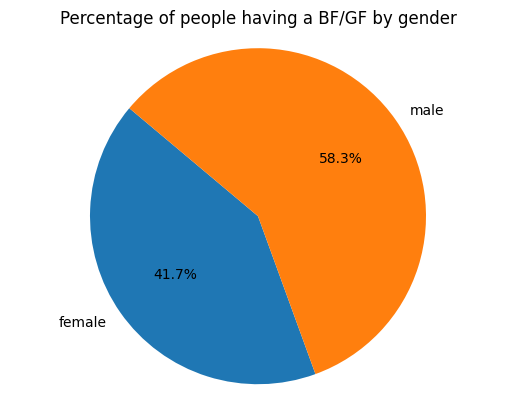

In [14]:
# Summarize data for pie chart
summary = df.groupby('gender')['have_bf_gf'].sum().reset_index()

# Create pie chart
labels = summary['gender']
sizes = summary['have_bf_gf']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Percentage of people having a BF/GF by gender')
plt.show()

In [26]:
import matplotlib.pyplot as plt



In [15]:
import pandas as pd

data = pd.read_csv("crop.csv")

print(data.to_string())

        N    P    K  temperature   humidity        ph    rainfall        label
0      90   42   43    20.879744  82.002744  6.502985  202.935536         rice
1      85   58   41    21.770462  80.319644  7.038096  226.655537         rice
2      60   55   44    23.004459  82.320763  7.840207  263.964248         rice
3      74   35   40    26.491096  80.158363  6.980401  242.864034         rice
4      78   42   42    20.130175  81.604873  7.628473  262.717340         rice
5      69   37   42    23.058049  83.370118  7.073454  251.055000         rice
6      69   55   38    22.708838  82.639414  5.700806  271.324860         rice
7      94   53   40    20.277744  82.894086  5.718627  241.974195         rice
8      89   54   38    24.515881  83.535216  6.685346  230.446236         rice
9      68   58   38    23.223974  83.033227  6.336254  221.209196         rice
10     91   53   40    26.527235  81.417538  5.386168  264.614870         rice
11     90   46   42    23.978982  81.450616  7.50283

In [28]:
# check for null values
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [29]:
print(data.describe)

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>


In [16]:
# check for duplicate values

print(data.duplicated().sum())

0


<Axes: >

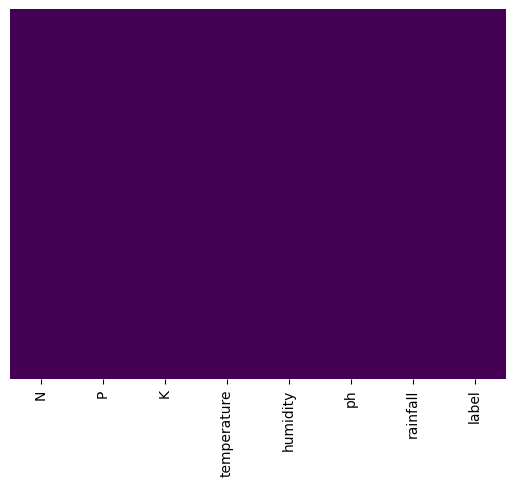

In [19]:
# check for null / missing values using heatmap

import seaborn as sns

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

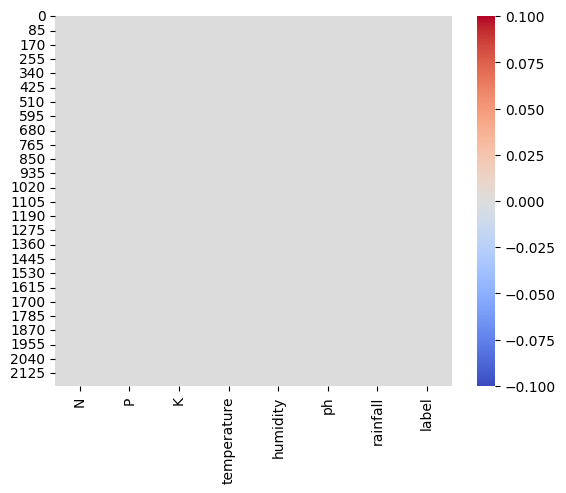

In [11]:
# Method 2

# N is Nitrogen
# K is Potassium
# P is Phosphorous

sns.heatmap(data.isnull(), cmap= 'coolwarm')

plt.show()

In [13]:
# Distribution of temperature

print(data['temperature'].value_counts())

temperature
23.603016    1
20.879744    1
21.770462    1
23.004459    1
26.491096    1
            ..
26.800796    1
23.978982    1
26.527235    1
23.223974    1
24.515881    1
Name: count, Length: 2200, dtype: int64


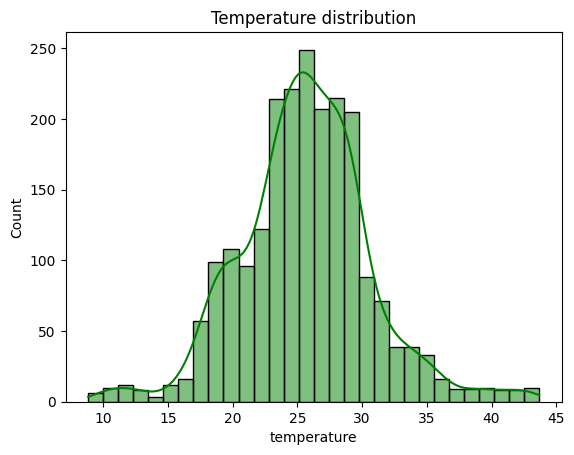

In [20]:
# Distribution of temperature(graph, normal distribution)

sns.histplot(data['temperature'], bins =30, kde=True, color='green')
plt.title('Temperature distribution')
plt.show()

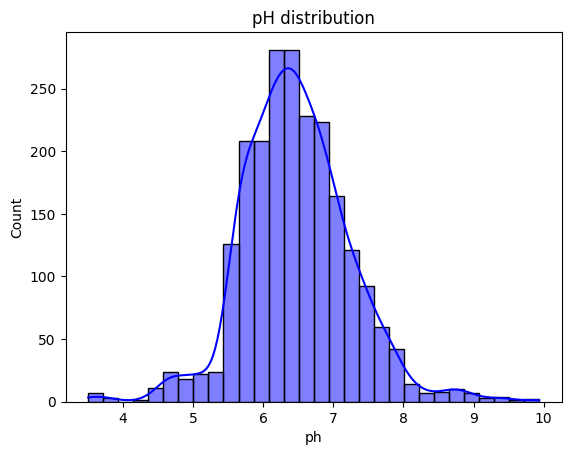

In [31]:
# Distribution of pH(graph, normal distribution)

sns.histplot(data['ph'], bins =30, kde=True, color='blue')
plt.title('pH distribution')
plt.show()

/tmp/ipykernel_57124/3964888169.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=data, palette='plasma_r')


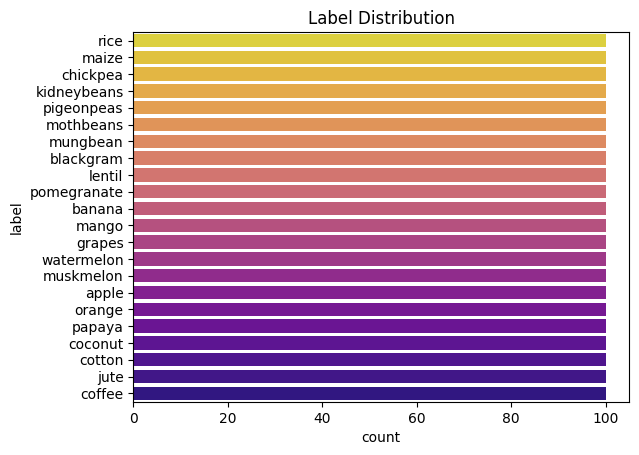

In [34]:
# Check if the dataset is balanced or not

sns.countplot(y='label', data=data, palette='plasma_r')
plt.title('Label Distribution')
plt.show()

/tmp/ipykernel_57124/3003365497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='label', x='ph', data=data, palette='plasma_r')


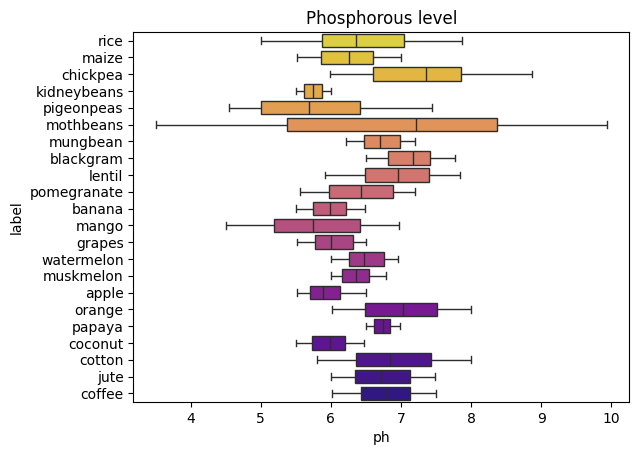

In [36]:
# Phosphorous level

sns.boxplot(y='label', x='ph', data=data, palette='plasma_r')
plt.title('Phosphorous level')
plt.show()

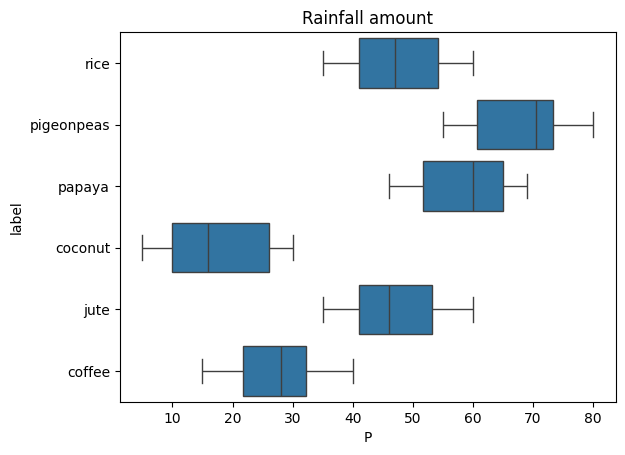

In [40]:
# Checking the rainfall amount

sns.boxplot(y='label', x='P', data=data[data['rainfall']>150])
plt.title('Rainfall amount')
plt.show()

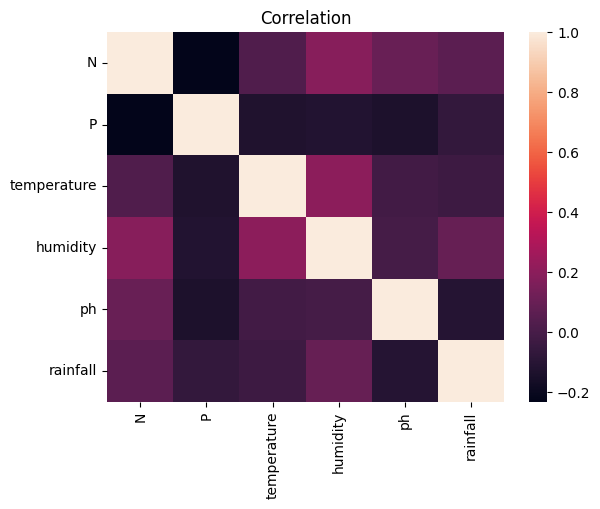

In [41]:
# Correlation, relationship between columns
c =data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
data['target'] = c.cat.codes

y = data.target
X = data[['N', 'P', 'temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()